In [236]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from itertools import combinations

from sklearn.inspection import permutation_importance


In [237]:
data_khanka=pd.read_csv('Steppe_Khanka_and rasters_add.csv', sep=',')

In [238]:
data_khanka.head()

,gbifID,datasetKey,occurrenceID,family,species,infraspecificEpithet,taxonRank,scientificName,countryCode,decimalLatitude,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
0,2.311266e+09,e7a2f416-fea5-41bb-8f17-5217fcaa74d7,NSK0000027,Amaryllidaceae,Allium anisopodium Ledeb.,argunense,SUBSPECIES,Allium anisopodium subsp. argunense Peschkova,RUS,51.467000,...,3.0,89.0,-225.0,8257.5,8257.5,29.78,45.30,-0.28,38.32,648.15997
1,2.417592e+09,3942a8dc-9f01-420d-a829-01675dc01c73,5464942,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,39.710000,...,7.0,197.0,-6.0,27310.5,36760.5,52.20,30.90,-0.41,70.70,1033.93994
2,2.417447e+09,3942a8dc-9f01-420d-a829-01675dc01c73,6562119,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,34.560000,...,7.0,177.0,34.0,36868.5,41340.0,55.33,24.70,-0.47,52.28,1049.94995
3,2.417662e+09,3942a8dc-9f01-420d-a829-01675dc01c73,6562129,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,38.280000,...,6.0,169.0,-15.0,24759.0,32778.0,32.04,32.05,-0.62,61.60,1067.57996
4,1.303784e+09,f9336171-e9a9-4147-b9f6-2d6c133afffd,6562138,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,36.107933,...,7.0,227.0,22.0,34668.0,49846.5,77.90,26.90,-0.13,37.53,852.62000


In [239]:
data_khanka.shape

(28658, 73)

In [240]:
hanka_only = data_khanka[(data_khanka.decimalLatitude < 45.236845) & (data_khanka.decimalLatitude > 43.797226) & (data_khanka.decimalLongitude> 131.257678) & (data_khanka.decimalLongitude< 131.981854)&(data_khanka.countryCode=='RUS')].copy()

In [241]:
#hanka_only = pd.read_csv('Steppe_Khanka_only_points.csv', sep=',')

In [242]:
hanka_only.shape

(650, 73)

In [243]:
data_prim=pd.read_csv('Steppe_Prim_and rasters_add.csv', sep=',') 

In [244]:
data_prim.shape

(12721, 75)

In [245]:
data_mes=pd.read_csv('Steppe_mes_and rasters_add.csv', sep=',') 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12232\2179704881.py:1: DtypeWarning: Columns (5,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data_mes=pd.read_csv('Steppe_mes_and rasters_add.csv', sep=',')


In [246]:
data_mes.shape

(51823, 75)

In [247]:
data_steppe=pd.read_csv('Steppe_steppe_and rasters_add.csv') 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12232\391047677.py:1: DtypeWarning: Columns (9,10,14,19,20,22,23,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_steppe=pd.read_csv('Steppe_steppe_and rasters_add.csv')


In [248]:
data_steppe.shape

(34725, 77)

In [249]:
data_steppe_checks=pd.read_csv('Steppe_check_rasters.csv') 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12232\348706428.py:1: DtypeWarning: Columns (19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data_steppe_checks=pd.read_csv('Steppe_check_rasters.csv')


In [250]:
data_steppe_checks.shape

(20714, 78)

### Khanda dataset:

In [251]:
data_khanka.head()

,gbifID,datasetKey,occurrenceID,family,species,infraspecificEpithet,taxonRank,scientificName,countryCode,decimalLatitude,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
0,2.311266e+09,e7a2f416-fea5-41bb-8f17-5217fcaa74d7,NSK0000027,Amaryllidaceae,Allium anisopodium Ledeb.,argunense,SUBSPECIES,Allium anisopodium subsp. argunense Peschkova,RUS,51.467000,...,3.0,89.0,-225.0,8257.5,8257.5,29.78,45.30,-0.28,38.32,648.15997
1,2.417592e+09,3942a8dc-9f01-420d-a829-01675dc01c73,5464942,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,39.710000,...,7.0,197.0,-6.0,27310.5,36760.5,52.20,30.90,-0.41,70.70,1033.93994
2,2.417447e+09,3942a8dc-9f01-420d-a829-01675dc01c73,6562119,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,34.560000,...,7.0,177.0,34.0,36868.5,41340.0,55.33,24.70,-0.47,52.28,1049.94995
3,2.417662e+09,3942a8dc-9f01-420d-a829-01675dc01c73,6562129,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,38.280000,...,6.0,169.0,-15.0,24759.0,32778.0,32.04,32.05,-0.62,61.60,1067.57996
4,1.303784e+09,f9336171-e9a9-4147-b9f6-2d6c133afffd,6562138,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,36.107933,...,7.0,227.0,22.0,34668.0,49846.5,77.90,26.90,-0.13,37.53,852.62000


### Prim dataset

In [252]:
data_prim.head()

,gbifID,datasetKey,occurrenceID,family,species,infraspecificEpithet,taxonRank,scientificName,countryCode,decimalLatitude,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
0,3464835138,4d1b5fed-e12f-48e8-94cb-88cf80115dd1,urn:lsid:biocol.org:col:15550:16:0119:0414,Asteraceae,Crepidiastrum tenuifolium (Willd.) Sennikov,altaica,SUBSPECIES,Youngia tenuifolia subsp. altaica Babc. & Steb...,RUS,51.12980,...,5.0,119.0,-93.0,10957.5,16485.0,51.39,32.75,-0.14,42.63,737.26001
1,3464882136,4d1b5fed-e12f-48e8-94cb-88cf80115dd1,urn:lsid:biocol.org:col:15550:16:0495:0336,Asteraceae,Crepidiastrum tenuifolium (Willd.) Sennikov,altaica,SUBSPECIES,Youngia tenuifolia subsp. altaica Babc. & Steb...,RUS,51.20270,...,5.0,113.0,-99.0,10440.0,15487.5,53.12,32.70,-0.09,39.21,714.76001
2,2382490292,54f946aa-2ca9-4a51-9ee5-011219e0381e,https://brnu.jacq.org/BRNU581205,Asteraceae,Crepidiastrum tenuifolium (Willd.) Sennikov,altaica,SUBSPECIES,Youngia tenuifolia subsp. altaica Babc. & Steb...,RUS,50.40139,...,5.0,118.0,-108.0,10785.0,16243.5,30.70,33.85,-0.48,52.58,725.84998
3,2382490309,54f946aa-2ca9-4a51-9ee5-011219e0381e,https://brnu.jacq.org/BRNU581206,Asteraceae,Crepidiastrum tenuifolium (Willd.) Sennikov,altaica,SUBSPECIES,Youngia tenuifolia subsp. altaica Babc. & Steb...,RUS,50.51586,...,5.0,123.0,-106.0,11152.5,16957.5,30.45,34.15,-0.49,53.33,740.52002
4,2570621591,0eacbbfa-45b9-41dc-b7e3-1f0773ce1477,Flora_of_Siberia_2007_Vol_13_map_196_locality_1,Asteraceae,Crepidiastrum tenuifolium (Willd.) Sennikov,tenuifolia,SUBSPECIES,Youngia tenuifolia subsp. tenuifolia,RUS,53.95200,...,5.0,127.0,-114.0,10792.5,15939.0,40.60,35.00,-0.25,47.11,680.77002


### Steppe dataset

In [253]:
data_steppe.head()

,gbifID,datasetKey,occurrenceID,family,species,infraspecificEpithet,taxonRank,scientificName,countryCode,decimalLatitude,...,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET,Unnamed: 75,Unnamed: 76
0,4045462570,4515e736-fa02-44ee-9808-bf89445104fe,9663470,Amaranthaceae,Bassia prostrata (L.) Beck,canescens,VARIETY,Kochia prostrata var. canescens Moq.,CHN,44.21,...,-63.0,23877.0,27348.0,7.74,36.25,-0.89,89.08,979.66998,NaN,NaN
1,4045444803,4515e736-fa02-44ee-9808-bf89445104fe,9402440,Amaranthaceae,Bassia prostrata (L.) Beck,canescens,VARIETY,Kochia prostrata var. canescens Moq.,CHN,43.8,...,-82.0,25452.0,25452.0,17.14,37.00,-0.75,76.88,934.01001,NaN,NaN
2,4045243421,4515e736-fa02-44ee-9808-bf89445104fe,6529847,Amaranthaceae,Bassia prostrata (L.) Beck,canescens,VARIETY,Kochia prostrata var. canescens Moq.,CHN,40.93,...,-30.0,20989.5,24372.0,16.16,28.25,-0.80,80.31,939.57001,NaN,NaN
3,4044826650,4515e736-fa02-44ee-9808-bf89445104fe,9663462,Amaranthaceae,Bassia prostrata (L.) Beck,canescens,VARIETY,Kochia prostrata var. canescens Moq.,CHN,44.3,...,-74.0,29578.5,38758.5,10.48,38.35,-0.86,86.21,1058.62000,NaN,NaN
4,4044826649,4515e736-fa02-44ee-9808-bf89445104fe,9663451,Amaranthaceae,Bassia prostrata (L.) Beck,canescens,VARIETY,Kochia prostrata var. canescens Moq.,CHN,44.43,...,-103.0,29316.0,34020.0,10.58,40.45,-0.86,86.65,1058.44995,NaN,NaN


### Mesophites dataset (mes)

In [254]:
data_mes.head()

,gbifID,datasetKey,occurrenceID,family,species,infraspecificEpithet,taxonRank,scientificName,countryCode,decimalLatitude,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
0,3881342533,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/12648...,Apiaceae,Bupleurum komarovianum Lincz.,NaN,SPECIES,Bupleurum komarovianum O.A.Lincz.,RUS,44.569003,...,4.0,139.0,-94.0,13320.0,16201.5,70.14,32.05,0.15,20.44,666.88000
1,3881442492,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/12648...,Apiaceae,Bupleurum komarovianum Lincz.,NaN,SPECIES,Bupleurum komarovianum O.A.Lincz.,RUS,44.339847,...,5.0,161.0,-62.0,19278.0,19278.0,67.54,30.80,0.02,21.43,724.78998
2,3881672504,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/12648...,Apiaceae,Bupleurum komarovianum Lincz.,NaN,SPECIES,Bupleurum komarovianum O.A.Lincz.,RUS,44.634446,...,4.0,130.0,-111.0,9637.5,14973.0,71.67,32.85,0.21,14.34,643.08002
3,3923591598,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/13256...,Apiaceae,Bupleurum komarovianum Lincz.,NaN,SPECIES,Bupleurum komarovianum O.A.Lincz.,RUS,42.460158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3915607719,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/13665...,Apiaceae,Bupleurum komarovianum Lincz.,NaN,SPECIES,Bupleurum komarovianum O.A.Lincz.,RUS,43.752005,...,4.0,147.0,-84.0,13887.0,16968.0,80.04,31.15,0.23,15.97,666.79999


In [255]:
feature_columns = ['URB_2000', 'NVG_2000', 'GRS_2000',
       'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2',
       'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr',
       'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17',
       'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14',
       'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11',
       'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8',
       'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5',
       'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2',
       'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri',
       'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex',
       'current_30arcsec_PETWettestQuarter',
       'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality',
       'current_30arcsec_PETDriestQuarter',
       'current_30arcsec_PETColdestQuarter',
       'current_30arcsec_monthCountByTemp10',
       'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest',
       'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0',
       'current_30arcsec_embergerQ', 'current_30arcsec_continentality',
       'current_30arcsec_climaticMoistureIndex',
       'current_30arcsec_aridityIndexThornthwaite',
       'current_30arcsec_annualPET']

In [256]:
def process_dfs(*dfs):
    allowed_columns = ['species', 'countryCode', 'decimalLatitude', 'decimalLongitude'] + feature_columns
    processed_dfs = []
    for df in dfs:
        df.species = df.species.map(lambda x: ' '.join(map(str.strip, x.split()[:2])))
        df.species = df.species.map(lambda x: x.replace('Pulsatilla dahurica', 'Pulsatilla davurica'))
        _ = df.loc[:, feature_columns].apply(pd.to_numeric, errors='coerce').dropna()
        s = np.abs(stats.zscore(_.values))
        s = s[:,~np.isnan(s).any(axis=0)]
        _=_[(s < 3).all(axis=1)]
        df = df.loc[_.index]
        processed_dfs.append(df.loc[:, allowed_columns])
    return processed_dfs

In [257]:
data_khanka, data_prim, data_mes, data_steppe,hanka_only, data_steppe_checks=process_dfs(data_khanka, data_prim, data_mes, data_steppe,hanka_only, data_steppe_checks)

In [258]:
data_prim.species.value_counts()

Sabulina verna               5573
Thalictrum foetidum          1846
Crepidiastrum tenuifolium    1006
Braya humilis                 788
Thalictrum petaloideum        570
Clausia aprica                474
Carex macroprophylla          276
Name: species, dtype: int64

In [259]:
data_khanka.species.value_counts()

Carex pediformis                2246
Orostachys spinosa              1750
Nepeta multifida                1194
Polygala sibirica               1148
Pulsatilla turczaninovii         900
Helictochloa hookeri             876
Iris humilis                     817
Carex duriuscula                 810
Patrinia rupestris               794
Bupleurum scorzonerifolium       769
Ephedra monosperma               663
Rhaponticum uniflorum            628
Klasea centauroides              611
Allium anisopodium               594
Artemisia laciniata              591
Polygala tenuifolia              583
Lespedeza juncea                 566
Clematis hexapetala              554
Carex korshinskyi                534
Scutellaria baicalensis          470
Ulmus macrocarpa                 457
Stipa baicalensis                441
Filifolium sibiricum             382
Adenophora stenanthina           323
Leontopodium leontopodioides     322
Prunus sibirica                  308
Cleistogenes kitagawae           279
E

In [260]:
data_mes.species.value_counts()

Trifolium lupinaster          2871
Arundinella hirta             2715
Viola mandshurica             2241
Patrinia scabiosifolia        2144
Spodiopogon sibiricus         2023
Flueggea suffruticosa         1724
Hemerocallis minor            1629
Artemisia gmelinii            1554
Vicia amoena                  1479
Kitagawia terebinthacea       1309
Artemisia scoparia            1241
Thesium chinense              1225
Paeonia lactiflora            1039
Platycodon grandiflorus        886
Dictamnus dasycarpus           776
Pulsatilla cernua              756
Iris uniflora                  708
Anthoxanthum glabrum           685
Silene repens                  628
Elymus gmelinii                617
Vincetoxicum changqinianum     559
Cotoneaster laxiflorus         534
Lithospermum erythrorhizon     475
Lilium concolor                470
Saussurea pulchella            409
Veronica linariifolia          369
Potentilla flagellaris         365
Dontostemon dentatus           365
Viola dissecta      

In [261]:
data_steppe.species.value_counts()

Artemisia frigida            6167
Linum perenne                2099
Bassia prostrata             1709
Goniolimon speciosum         1254
Delphinium grandiflorum      1121
Potentilla acaulis           1039
Achnatherum sibiricum        1000
Eremogone capillaris          976
Stellaria dichotoma           792
Alyssum lenense               770
Caragana pygmaea              609
Leymus chinensis              600
Phlojodicarpus sibiricus      568
Stipa krylovii                533
Physochlaina physaloides      512
Allium tenuissimum            505
Oxytropis oxyphylla           480
Stellera chamaejasme          464
Oxytropis myriophylla         460
Androsace incana              442
Heteropappus altaicus         387
Allium bidentatum             361
Bupleurum bicaule             348
Iris dichotoma                340
Thalictrum squarrosum         284
Saussurea salicifolia         277
Astragalus melilotoides       262
Persicaria angustifolia       230
Corispermum declinatum        213
Cymbaria dauri

In [262]:
data_steppe_checks.species.value_counts()

Lappula squarrosa          10524
Axyris amaranthoides         959
Sophora flavescens           794
Orostachys malacophylla      499
Pulsatilla davurica          366
Gentiana squarrosa           363
Gueldenstaedtia verna        266
Astragalus davuricus         138
Iris oxypetala               125
Name: species, dtype: int64

# LDA data preparation

In [263]:
def prepare_classification_data(*dfs, features=feature_columns):
    X = []
    y = []
    for ind, df in enumerate(dfs):
        _ = df.loc[:, features]
        _ = _.sample(frac=0.1)
        X.append(_)
        y+=[ind] * len(_)
    return pd.concat(X, axis=0).values, np.array(y)

In [264]:
X, y = prepare_classification_data(data_khanka, data_prim, data_mes, data_steppe,hanka_only) 

In [265]:
X.shape

(9699, 54)

### y -- переменная, отражающая принадлежность набору данных -- их всего здесь 5;

In [266]:
y.shape

(9699,)

In [267]:
from itertools import cycle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from IPython.core.display import HTML, display_html

In [268]:
def analyze_datasets(datasets, features=feature_columns, n_components=2):
    dataset_names = '_'.join(datasets.keys())
    X, y = prepare_classification_data(*datasets.values(), features=features)
    
    if len(datasets) > 2:
        lda = LinearDiscriminantAnalysis(n_components=n_components)
        transformed_data = lda.fit_transform(X, y)
        for col, marker, cl in zip(cycle('rbyck'), cycle('xodv'), range(len(datasets.keys()))):
            plt.scatter(transformed_data[y==cl, 0], transformed_data[y==cl, 1], marker=marker, color=col, label=list(datasets.keys())[cl], alpha=0.3)

        plt.legend()
        plt.show()
    
        display_html(HTML(f'<h3>Explained coef ratio (LDA) for {dataset_names}: {lda.explained_variance_ratio_} </h3>'))
   
    display_html(HTML('<h3>Feature importances of all considered features: </h3>'))
    klf = RandomForestClassifier()
    klf.fit(X, y)
    for name, val in sorted(list(zip(features, klf.feature_importances_)), key=lambda x: x[1], reverse=True):
        print(f"{name} = {val}")
    
    
    display_html(HTML('<h3>Recursive feature elimination procedure, selection the most informative features from</h3>'))
    print(features)
    selector = RFECV(klf, step=1, cv=5, verbose=0, n_jobs=6, scoring="balanced_accuracy")
    selector.fit(X, y)
    
    for feature_name, rank in zip(features, selector.ranking_):
        print(f"{feature_name}: {rank}")
    
    selected_features = np.array(features)[selector.support_]
    
    for feature_name, imp in sorted(zip(selected_features, selector.estimator_.feature_importances_), key=lambda x: x[1], reverse=True): 
        print(f"{feature_name}: {imp}")
    
    display_html(HTML('<h3>Balanced accuracy estimation for the best feature subset: </h3>'))
    klf.fit(X[:, selector.support_], y)
    print(cross_val_score(klf, X[:, selector.support_], y, scoring='balanced_accuracy'))
        
    
    display_html(HTML('<h3>Balanced accuracy estimation for all features in the experiment: </h3>'))
    print(cross_val_score(klf, X, y, cv=5, scoring='balanced_accuracy'))
    
#     for name, df in datasets.items():
#         display_html(HTML(f'<h3>Descriptive measures for: {name}</h3>'))
#         display_html(df.loc[:, features].describe())

    display_html(HTML('<hr>'))



In [269]:
feature_sets={
    'soil': ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7'] + ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000'],
    'WC21': ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14',
    'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8',
    'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2',
    'wc2.1_30s_bio_1', 'wc2.1_30s_elev'],
    'all_features': feature_columns,
}

datasets = {
    'prim': data_prim,
    'khanka':data_khanka,
    'mes': data_mes,
    'steppe': data_steppe,
    'khanka_only': hanka_only,
    #'checks': data_steppe_checks
}


In [270]:
def analyze_all():
    for feature_set_name, features in feature_sets.items():
        
        display_html(HTML(f'<h1>All datasets. Feature set name: {feature_set_name}</h1>'))
        display_html(HTML(f'<h2>datasets: {list(datasets.keys())} </h2>'))
        analyze_datasets(datasets, features=features)
        
        display_html(HTML('<hr>'))
        
        display_html(HTML(f'<h1>Pair analysis.  Feature set name: {feature_set_name}</h1>'))

        all_dataset_combinations = list(combinations(list(datasets.keys()), 2))
        
        for name1, name2 in all_dataset_combinations:
            display_html(HTML(f'<h2>Datasets to compare: {name1}, {name2}</h2>'))
            analyze_datasets({name1: datasets[name1], name2: datasets[name2]}, features=features)
    
        display_html(HTML('<h1>END OF COMPUTATIONS</h1>'))

All datasets. Feature set name: soil

datasets: ['prim', 'khanka', 'mes', 'steppe', 'khanka_only']

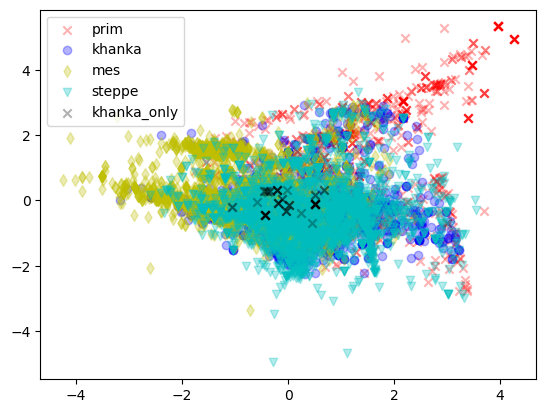

Explained coef ratio (LDA) for prim_khanka_mes_steppe_khanka_only: [0.64944748 0.28594726]

Feature importances of all considered features:

GRS_2000 = 0.1548868061997605
URB_2000 = 0.1341148434340231
FOR_2000 = 0.12652295731885085
CULTRF_2000 = 0.11035857494023497
NVG_2000 = 0.10953460106763593
CULT_2000 = 0.10777454906738079
CULTIR_2000 = 0.06843881738846071
sq7 = 0.049354380144762934
sq3 = 0.04442960711649244
sq1 = 0.02753288669749944
sq2 = 0.022933750657003257
sq4 = 0.021707937876269096
sq5 = 0.012308293667632786
sq6 = 0.010101994423993212


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 2
sq5: 3
sq6: 4
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
GRS_2000: 0.15750421146087393
URB_2000: 0.14030301698498557
FOR_2000: 0.13298726456818658
CULTRF_2000: 0.11392000866273971
NVG_2000: 0.11318639664107782
CULT_2000: 0.10720818927660096
CULTIR_2000: 0.06635880162474324
sq7: 0.05382356249484002
sq3: 0.05104865993222737
sq1: 0.03384013074232791
sq2: 0.029819757611397057


Balanced accuracy estimation for the best feature subset:

[0.55128484 0.53078592 0.60446516 0.48754112 0.53531327]


Balanced accuracy estimation for all features in the experiment:

[0.55079175 0.51205266 0.55770391 0.49174711 0.56990226]


Pair analysis. Feature set name: soil

Datasets to compare: prim, khanka

Feature importances of all considered features:

GRS_2000 = 0.14027798410929102
FOR_2000 = 0.12278948548367148
URB_2000 = 0.1153269134105128
sq3 = 0.11012681018897273
sq7 = 0.09482768149057887
CULT_2000 = 0.08783265865635416
CULTRF_2000 = 0.0845383725804723
NVG_2000 = 0.07530831731342544
CULTIR_2000 = 0.05429920236492026
sq2 = 0.028764629183906473
sq1 = 0.028263846053689402
sq4 = 0.024254944161619482
sq5 = 0.022498529009881127
sq6 = 0.010890625992704609


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 2
sq5: 3
sq6: 4
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
GRS_2000: 0.1495951807045156
FOR_2000: 0.12573195861598205
sq3: 0.12068390154488631
URB_2000: 0.11655739675595084
sq7: 0.09619769264225043
CULTRF_2000: 0.09184277211655244
CULT_2000: 0.08452579453409133
NVG_2000: 0.07624413465170311
CULTIR_2000: 0.056411594025710936
sq1: 0.044843275298351616
sq2: 0.037366299110005406


Balanced accuracy estimation for the best feature subset:

[0.78981936 0.74934059 0.78110255 0.77446271 0.80719553]


Balanced accuracy estimation for all features in the experiment:

[0.78538477 0.74349261 0.78205883 0.78348083 0.80957649]


Datasets to compare: prim, mes

Feature importances of all considered features:

GRS_2000 = 0.15439251569605372
sq7 = 0.15108063778488698
sq3 = 0.10880658837838855
URB_2000 = 0.08991653262489427
FOR_2000 = 0.08231243377903069
CULT_2000 = 0.07698128370650785
CULTRF_2000 = 0.07155585291396697
CULTIR_2000 = 0.06066373103825212
NVG_2000 = 0.04716642811750095
sq2 = 0.03517483326941199
sq5 = 0.034782447908976305
sq1 = 0.03150462468446024
sq6 = 0.029711726332471447
sq4 = 0.025950363765197854


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 1
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
GRS_2000: 0.1587744782307895
sq7: 0.15311995905336
sq3: 0.09193387524530844
URB_2000: 0.08946648337398727
FOR_2000: 0.08375457454810109
CULT_2000: 0.0788708773472081
CULTRF_2000: 0.0759697151054852
CULTIR_2000: 0.05853576879215037
sq5: 0.05194062438181204
NVG_2000: 0.04819869446830531
sq4: 0.03269989393959154
sq1: 0.03265012797325964
sq2: 0.026736007941398077
sq6: 0.017348919599243503


Balanced accuracy estimation for the best feature subset:

[0.83318972 0.82685102 0.86934185 0.83317613 0.83453365]


Balanced accuracy estimation for all features in the experiment:

[0.83586294 0.83801065 0.86934185 0.83555708 0.84712712]


Datasets to compare: prim, steppe

Feature importances of all considered features:

GRS_2000 = 0.1382332626363571
FOR_2000 = 0.12973143003413004
URB_2000 = 0.11416649253996726
sq7 = 0.10896393859352353
CULT_2000 = 0.09609847574817237
sq3 = 0.09286325123994396
NVG_2000 = 0.09109278586321101
CULTRF_2000 = 0.08878497363411032
CULTIR_2000 = 0.04509761104025859
sq1 = 0.02241680814139527
sq4 = 0.020122595639135158
sq5 = 0.02000280043429984
sq2 = 0.019048806621568028
sq6 = 0.013376767833927564


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 2
sq3: 1
sq4: 3
sq5: 1
sq6: 4
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
GRS_2000: 0.14597592223505007
FOR_2000: 0.13485006809193828
URB_2000: 0.12016856998762039
sq7: 0.10507538888143221
CULT_2000: 0.10073989704595135
sq3: 0.09997819167654906
NVG_2000: 0.09807168013608991
CULTRF_2000: 0.08508826284377705
CULTIR_2000: 0.04523268536399754
sq1: 0.03331874131637042
sq5: 0.03150059242122384


Balanced accuracy estimation for the best feature subset:

[0.77281846 0.77068532 0.79132465 0.77255523 0.76146466]


Balanced accuracy estimation for all features in the experiment:

[0.76386103 0.78028226 0.79831539 0.76263973 0.76608573]


Datasets to compare: prim, khanka_only

Feature importances of all considered features:

URB_2000 = 0.20039102830501185
FOR_2000 = 0.13778686673904195
GRS_2000 = 0.13492391850793548
CULT_2000 = 0.12037388323288147
CULTRF_2000 = 0.10287955141771035
sq3 = 0.07201483108738187
sq7 = 0.06260854578990227
CULTIR_2000 = 0.059561739956846806
sq2 = 0.04006486942242445
sq1 = 0.03348859265104117
NVG_2000 = 0.024838473645218684
sq4 = 0.007857571068158261
sq5 = 0.0028699697976105787
sq6 = 0.00034015837883493366


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 2
sq5: 3
sq6: 4
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
URB_2000: 0.20694265602658624
FOR_2000: 0.15095870778356527
GRS_2000: 0.11703148744630627
CULTRF_2000: 0.11214019687997141
CULT_2000: 0.10711404078653494
sq3: 0.08027971967540608
CULTIR_2000: 0.0708287823164898
sq7: 0.058094222736998116
sq2: 0.04006314964148245
sq1: 0.030152749438074344
NVG_2000: 0.026394287268585236


Balanced accuracy estimation for the best feature subset:

[0.95454545 0.8        0.95       0.81580087 0.72727273]


Balanced accuracy estimation for all features in the experiment:

[1.         0.8        0.95       0.81341991 0.72727273]


Datasets to compare: khanka, mes

Feature importances of all considered features:

GRS_2000 = 0.15091024089498914
URB_2000 = 0.12532497664299433
NVG_2000 = 0.12292667747337309
FOR_2000 = 0.11355941850146242
CULTRF_2000 = 0.09749848239415229
CULT_2000 = 0.08958334739568916
CULTIR_2000 = 0.06084895901014185
sq7 = 0.05131380477927846
sq3 = 0.04487763969840135
sq1 = 0.042017505846458546
sq4 = 0.033718623035004766
sq2 = 0.02955932712462705
sq6 = 0.01919626772919713
sq5 = 0.018664729474230344


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 2
sq6: 1
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
GRS_2000: 0.15833195696572097
URB_2000: 0.12844677789835024
NVG_2000: 0.11819153471125604
FOR_2000: 0.1110539871507121
CULTRF_2000: 0.09780137069672101
CULT_2000: 0.0875373372121067
CULTIR_2000: 0.06264251117474295
sq3: 0.05670416580774528
sq7: 0.049837943565471915
sq1: 0.03559653391766067
sq2: 0.03492373292499608
sq4: 0.03484321398824453
sq6: 0.024088933986271516


Balanced accuracy estimation for the best feature subset:

[0.7381945  0.72969843 0.75813186 0.74477592 0.77284486]


Balanced accuracy estimation for all features in the experiment:

[0.7412632  0.72389624 0.76172467 0.7456158  0.76424444]


Datasets to compare: khanka, steppe

Feature importances of all considered features:

GRS_2000 = 0.16183864825517144
FOR_2000 = 0.15998095652172925
URB_2000 = 0.150919268963677
CULTRF_2000 = 0.12114408941243124
CULT_2000 = 0.11732987864848343
NVG_2000 = 0.10633005307738702
CULTIR_2000 = 0.06405764502673958
sq3 = 0.023194581315265615
sq7 = 0.02243223005087841
sq4 = 0.021458145428214812
sq1 = 0.020653272053258967
sq2 = 0.01829535208947167
sq5 = 0.007858330307391952
sq6 = 0.00450754884989957


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 2
sq6: 3
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
GRS_2000: 0.16306475301102596
FOR_2000: 0.1592282058681327
URB_2000: 0.1518779122464714
CULTRF_2000: 0.12112087527007062
CULT_2000: 0.11714997361623311
NVG_2000: 0.10802479244182664
CULTIR_2000: 0.06646947004849797
sq7: 0.024659538921187905
sq4: 0.0233114650591346
sq3: 0.023263945997733907
sq1: 0.02290721876351205
sq2: 0.018921848756173126


Balanced accuracy estimation for the best feature subset:

[0.64969206 0.60982612 0.61985688 0.63464431 0.60008361]


Balanced accuracy estimation for all features in the experiment:

[0.6419487  0.61205282 0.63131427 0.64369997 0.59841961]


Datasets to compare: khanka, khanka_only

Feature importances of all considered features:

URB_2000 = 0.2024167845600431
GRS_2000 = 0.17154104141081955
CULTRF_2000 = 0.16523047491346227
FOR_2000 = 0.15842142153417835
CULT_2000 = 0.14559865816296194
NVG_2000 = 0.030484783156360523
CULTIR_2000 = 0.029253785321621182
sq2 = 0.026625712499320206
sq1 = 0.025511468496391805
sq3 = 0.017723988945769042
sq7 = 0.015006375867454624
sq4 = 0.01110484083547416
sq5 = 0.0009830251906922654
sq6 = 9.763910545103002e-05


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 3
sq4: 4
sq5: 5
sq6: 6
sq7: 2
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
URB_2000: 0.26403880842491667
FOR_2000: 0.19061897897365976
GRS_2000: 0.1797596019421352
CULT_2000: 0.13761522042900015
CULTRF_2000: 0.13452176129380097
CULTIR_2000: 0.028941510345695483
sq1: 0.023735907379984194
NVG_2000: 0.023170685968103635
sq2: 0.01759752524270418


Balanced accuracy estimation for the best feature subset:

[0.79336283 0.84557522 0.67405765 0.67738359 0.76385809]


Balanced accuracy estimation for all features in the experiment:

[0.79225664 0.84557522 0.67405765 0.5864745  0.76385809]


Datasets to compare: mes, steppe

Feature importances of all considered features:

NVG_2000 = 0.1728424743403887
GRS_2000 = 0.14963323242665955
CULTRF_2000 = 0.11671182547619009
FOR_2000 = 0.10573464114763043
URB_2000 = 0.10310411543960742
CULT_2000 = 0.10253869427871792
CULTIR_2000 = 0.05580278946182822
sq7 = 0.04095285329698587
sq3 = 0.03915032742994111
sq1 = 0.03353585158663566
sq4 = 0.0230621542579132
sq2 = 0.023039588410310695
sq5 = 0.017513249576240487
sq6 = 0.01637820287095045


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 2
sq6: 3
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
NVG_2000: 0.20451327606335587
GRS_2000: 0.14415923022503035
CULTRF_2000: 0.12300936349323006
FOR_2000: 0.10235839794092408
URB_2000: 0.10020301600736341
CULT_2000: 0.09882231729990101
CULTIR_2000: 0.05360525241722061
sq7: 0.04506199914226669
sq3: 0.03939029710213098
sq1: 0.03228543839766012
sq4: 0.029320686933974386
sq2: 0.02727072497694239


Balanced accuracy estimation for the best feature subset:

[0.83577206 0.84428897 0.84740787 0.83013677 0.82096592]


Balanced accuracy estimation for all features in the experiment:

[0.82330597 0.84128081 0.84739005 0.83309146 0.82372074]


Datasets to compare: mes, khanka_only

Feature importances of all considered features:

GRS_2000 = 0.2066159379181964
FOR_2000 = 0.16911762573039643
URB_2000 = 0.15957565730315915
CULTRF_2000 = 0.1593263891969343
CULT_2000 = 0.15660391340540042
sq2 = 0.034264230695219354
sq1 = 0.031178226079276294
CULTIR_2000 = 0.02856536520600402
sq4 = 0.016594413551470046
sq3 = 0.015381576344639132
sq7 = 0.011959394501730468
NVG_2000 = 0.009239189382046818
sq5 = 0.000853776653958587
sq6 = 0.0007243040315685745


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 3
sq4: 2
sq5: 5
sq6: 6
sq7: 1
URB_2000: 1
NVG_2000: 4
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
GRS_2000: 0.2241745806637033
URB_2000: 0.17638852260220703
CULTRF_2000: 0.17426609838818216
CULT_2000: 0.16116147714813375
FOR_2000: 0.1589639755401167
sq2: 0.042211552020911265
sq1: 0.027600289845928105
CULTIR_2000: 0.023198545784678205
sq7: 0.012034958006139445


Balanced accuracy estimation for the best feature subset:

[0.69931224 0.76790634 0.85950413 0.81404959 0.74655647]


Balanced accuracy estimation for all features in the experiment:

[0.64931224 0.76790634 0.76997245 0.81404959 0.79793388]


Datasets to compare: steppe, khanka_only

Feature importances of all considered features:

CULTRF_2000 = 0.16597344306960174
URB_2000 = 0.16110700993906552
GRS_2000 = 0.15791350921011182
FOR_2000 = 0.15411586785328005
CULT_2000 = 0.13595016026248913
CULTIR_2000 = 0.04347994112746683
NVG_2000 = 0.0403595010229938
sq1 = 0.03738775677790511
sq2 = 0.03350968202210736
sq3 = 0.032716139694000376
sq7 = 0.02728856646269543
sq4 = 0.0077086885286359
sq5 = 0.0021816387084420854
sq6 = 0.00030809532120496246


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 2
sq7: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
URB_2000: 0.1753270304759877
CULTRF_2000: 0.15986252251195293
FOR_2000: 0.15754488445823944
GRS_2000: 0.1480497405071998
CULT_2000: 0.1454904413491382
CULTIR_2000: 0.03763625649337982
NVG_2000: 0.03722686076180497
sq1: 0.03517701267177701
sq2: 0.03517128465122
sq7: 0.031089130559804813
sq3: 0.028543611575330377
sq4: 0.007135598525595244
sq5: 0.0017456254585698186


Balanced accuracy estimation for the best feature subset:

[0.86363636 0.90909091 0.77272727 0.85       0.9       ]


Balanced accuracy estimation for all features in the experiment:

[0.86363636 0.90909091 0.77272727 0.85       0.9       ]


END OF COMPUTATIONS

All datasets. Feature set name: WC21

datasets: ['prim', 'khanka', 'mes', 'steppe', 'khanka_only']

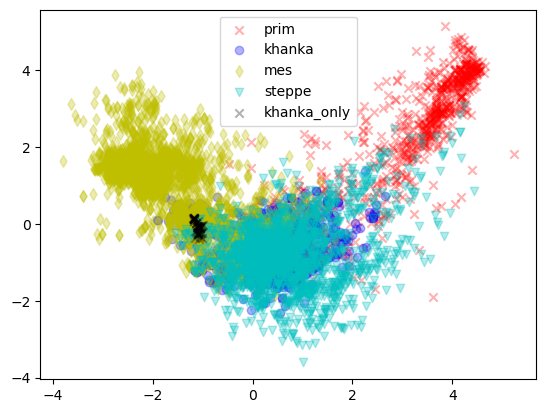

Explained coef ratio (LDA) for prim_khanka_mes_steppe_khanka_only: [0.6180672 0.31289847]

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.09795556491173597
wc2.1_30s_bio_16 = 0.084123890533657
wc2.1_30s_bio_13 = 0.07055055544886907
wc2.1_30s_bio_12 = 0.0690562285787172
wc2.1_30s_bio_4 = 0.06012252282969352
wc2.1_30s_bio_8 = 0.05469105544238022
wc2.1_30s_elev = 0.051442301431041476
wc2.1_30s_bio_1 = 0.05007138634256226
wc2.1_30s_bio_3 = 0.04797228982853866
wc2.1_30s_bio_10 = 0.044848925916311934
wc2.1_30s_bio_15 = 0.04474151688289049
wc2.1_30s_bio_19 = 0.04427055991154591
wc2.1_30s_bio_5 = 0.04050955574056186
wc2.1_30s_bio_2 = 0.03927624843263868
wc2.1_30s_bio_9 = 0.038951015556219694
wc2.1_30s_bio_7 = 0.038174025669365085
wc2.1_30s_bio_11 = 0.03737149965029485
wc2.1_30s_bio_17 = 0.03405589354187286
wc2.1_30s_bio_6 = 0.030754308069575263
wc2.1_30s_bio_14 = 0.02106065528152798


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 9
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 12
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 15
wc2.1_30s_bio_13: 4
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 11
wc2.1_30s_bio_10: 3
wc2.1_30s_bio_9: 6
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 8
wc2.1_30s_bio_6: 14
wc2.1_30s_bio_5: 13
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 2
wc2.1_30s_bio_2: 10
wc2.1_30s_bio_1: 7
wc2.1_30s_elev: 5
wc2.1_30s_bio_12: 0.17853280471847302
wc2.1_30s_bio_8: 0.17563209694577855
wc2.1_30s_bio_4: 0.1736162567387844
wc2.1_30s_bio_18: 0.1717823805527956
wc2.1_30s_bio_16: 0.15552930932826012
wc2.1_30s_bio_15: 0.144907151

Balanced accuracy estimation for the best feature subset:

[0.53650207 0.53695684 0.53223801 0.56766699 0.55897123]


Balanced accuracy estimation for all features in the experiment:

[0.52166189 0.55040356 0.53050036 0.56964213 0.55740577]


Pair analysis. Feature set name: WC21

Datasets to compare: prim, khanka

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.12775925186131645
wc2.1_30s_bio_17 = 0.09819828240558809
wc2.1_30s_bio_19 = 0.09111843730501049
wc2.1_30s_bio_4 = 0.08192207381529654
wc2.1_30s_bio_14 = 0.06482601603578253
wc2.1_30s_bio_7 = 0.0616540088801413
wc2.1_30s_bio_12 = 0.05523012490457245
wc2.1_30s_bio_9 = 0.04804525291580839
wc2.1_30s_bio_10 = 0.04188874574401612
wc2.1_30s_bio_15 = 0.04106117247818609
wc2.1_30s_elev = 0.03700451112050462
wc2.1_30s_bio_1 = 0.034930615415386584
wc2.1_30s_bio_2 = 0.03433959650144465
wc2.1_30s_bio_5 = 0.031916350055990826
wc2.1_30s_bio_3 = 0.02874519831310037
wc2.1_30s_bio_6 = 0.028243117259190403
wc2.1_30s_bio_13 = 0.02453502208010002
wc2.1_30s_bio_11 = 0.023570849419783487
wc2.1_30s_bio_18 = 0.02282122103142202
wc2.1_30s_bio_16 = 0.022190152457358617


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 1
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 1
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_8: 0.11187330053106573
wc2.1_30s_bio_17: 0.09931281705380648
wc2.1_30s_bio_19: 0.09617602518203905
wc2.1_30s_bio_4: 0.09030967349245803
wc2.1_30s_bio_14: 0.08655969938251301
wc2.1_30s_bio_15: 0.0646034970633

Balanced accuracy estimation for the best feature subset:

[0.81542859 0.79884091 0.80927586 0.82855036 0.81238938]


Balanced accuracy estimation for all features in the experiment:

[0.81195027 0.80262397 0.81053688 0.82778129 0.80303413]


Datasets to compare: prim, mes

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.20392625638035056
wc2.1_30s_bio_10 = 0.12897978829704812
wc2.1_30s_bio_5 = 0.1136677605547789
wc2.1_30s_bio_4 = 0.08183227673170933
wc2.1_30s_elev = 0.06534747616165615
wc2.1_30s_bio_1 = 0.03730996848084373
wc2.1_30s_bio_7 = 0.03640429335320727
wc2.1_30s_bio_19 = 0.034961180782135816
wc2.1_30s_bio_3 = 0.03237083442808842
wc2.1_30s_bio_18 = 0.030740157375890823
wc2.1_30s_bio_15 = 0.030183885923513898
wc2.1_30s_bio_9 = 0.03018317164274483
wc2.1_30s_bio_17 = 0.029105444958404936
wc2.1_30s_bio_16 = 0.027179530936983103
wc2.1_30s_bio_13 = 0.024618734888648134
wc2.1_30s_bio_12 = 0.02311593498532128
wc2.1_30s_bio_11 = 0.020613762756823265
wc2.1_30s_bio_2 = 0.018132139528056333
wc2.1_30s_bio_6 = 0.017510731538568153
wc2.1_30s_bio_14 = 0.01381667029522675


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 5
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 3
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 2
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 4
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_8: 0.23415462605760495
wc2.1_30s_bio_10: 0.1424698740746615
wc2.1_30s_bio_5: 0.09700249104122793
wc2.1_30s_bio_4: 0.08860883799693706
wc2.1_30s_elev: 0.06368823596143489
wc2.1_30s_bio_7: 0.057553289685068815

Balanced accuracy estimation for the best feature subset:

[0.90053269 0.88402661 0.87003055 0.8675149  0.88040142]


Balanced accuracy estimation for all features in the experiment:

[0.90290235 0.8769176  0.8704157  0.86820266 0.88315624]


Datasets to compare: prim, steppe

Feature importances of all considered features:

wc2.1_30s_bio_12 = 0.10272094812247748
wc2.1_30s_bio_17 = 0.085409291978417
wc2.1_30s_bio_4 = 0.07558856816849785
wc2.1_30s_bio_7 = 0.06988934087502449
wc2.1_30s_bio_19 = 0.06772156676145144
wc2.1_30s_bio_10 = 0.057934150662297845
wc2.1_30s_bio_14 = 0.054676714789927625
wc2.1_30s_bio_8 = 0.05269328921948342
wc2.1_30s_bio_5 = 0.04976289689614226
wc2.1_30s_bio_1 = 0.046200662440403446
wc2.1_30s_elev = 0.04610045985229012
wc2.1_30s_bio_16 = 0.03932087935339761
wc2.1_30s_bio_2 = 0.03891442284867955
wc2.1_30s_bio_3 = 0.03800393939247477
wc2.1_30s_bio_9 = 0.033570562740978915
wc2.1_30s_bio_15 = 0.031077350145380433
wc2.1_30s_bio_11 = 0.030846643222841193
wc2.1_30s_bio_6 = 0.029139155114428807
wc2.1_30s_bio_18 = 0.02625534309093822
wc2.1_30s_bio_13 = 0.024173814324467722


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 2
wc2.1_30s_bio_17: 1
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 1
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_12: 0.11275576824988341
wc2.1_30s_bio_17: 0.10305633446165588
wc2.1_30s_bio_4: 0.07601414613213037
wc2.1_30s_bio_19: 0.06031232680696079
wc2.1_30s_bio_10: 0.05527985491900815
wc2.1_30s_bio_7: 0.0538879905709

Balanced accuracy estimation for the best feature subset:

[0.80535431 0.81784216 0.81523596 0.79977995 0.80574773]


Balanced accuracy estimation for all features in the experiment:

[0.800212   0.81876637 0.81350579 0.7922454  0.80336678]


Datasets to compare: prim, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.25065707735363907
wc2.1_30s_bio_10 = 0.2319124929425549
wc2.1_30s_bio_5 = 0.0796062481562555
wc2.1_30s_elev = 0.06523582054569085
wc2.1_30s_bio_12 = 0.05187081709106403
wc2.1_30s_bio_1 = 0.040148162969226006
wc2.1_30s_bio_11 = 0.03742562351632849
wc2.1_30s_bio_18 = 0.033797418937330084
wc2.1_30s_bio_16 = 0.032284401873529704
wc2.1_30s_bio_19 = 0.027919739587095115
wc2.1_30s_bio_17 = 0.027785287587994766
wc2.1_30s_bio_15 = 0.026529147994882266
wc2.1_30s_bio_14 = 0.023482386137080074
wc2.1_30s_bio_7 = 0.013429422669875266
wc2.1_30s_bio_6 = 0.012502028873797803
wc2.1_30s_bio_4 = 0.011888723726931933
wc2.1_30s_bio_3 = 0.009760906171342745
wc2.1_30s_bio_13 = 0.008679950251244907
wc2.1_30s_bio_2 = 0.00836656077848136
wc2.1_30s_bio_9 = 0.006717782835655252


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 2
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 4
wc2.1_30s_bio_16: 3
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 5
wc2.1_30s_bio_13: 9
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 10
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 7
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 8
wc2.1_30s_bio_6: 12
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 11
wc2.1_30s_bio_3: 13
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 6
wc2.1_30s_elev: 1
wc2.1_30s_bio_10: 0.33933145617198957
wc2.1_30s_bio_8: 0.28776534711858454
wc2.1_30s_bio_5: 0.11170211717836588
wc2.1_30s_elev: 0.09978843185367578
wc2.1_30s_bio_18: 0.05207348830973851
wc2.1_30s_bio_15: 0.04801217593

Balanced accuracy estimation for the best feature subset:

[0.95454545 1.         1.         1.         0.99761905]


Balanced accuracy estimation for all features in the experiment:

[0.95454545 1.         1.         1.         1.        ]


Datasets to compare: khanka, mes

Feature importances of all considered features:

wc2.1_30s_bio_12 = 0.14256690720764292
wc2.1_30s_bio_1 = 0.07673392094542734
wc2.1_30s_bio_16 = 0.07235922828345152
wc2.1_30s_bio_18 = 0.07078596938804631
wc2.1_30s_bio_13 = 0.06611936296790479
wc2.1_30s_bio_4 = 0.05248890940399687
wc2.1_30s_elev = 0.04881473420588496
wc2.1_30s_bio_10 = 0.043605344951793225
wc2.1_30s_bio_7 = 0.04303155649763288
wc2.1_30s_bio_9 = 0.042272609120097844
wc2.1_30s_bio_11 = 0.0421121009632043
wc2.1_30s_bio_2 = 0.040075183422110444
wc2.1_30s_bio_15 = 0.039107622272882885
wc2.1_30s_bio_3 = 0.0377625329080496
wc2.1_30s_bio_8 = 0.036791609516644785
wc2.1_30s_bio_17 = 0.034715988250226516
wc2.1_30s_bio_6 = 0.03437439015373649
wc2.1_30s_bio_5 = 0.02848045107931276
wc2.1_30s_bio_19 = 0.02547406948590566
wc2.1_30s_bio_14 = 0.022327508976047933


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 9
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 11
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 12
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 4
wc2.1_30s_bio_9: 3
wc2.1_30s_bio_8: 6
wc2.1_30s_bio_7: 2
wc2.1_30s_bio_6: 8
wc2.1_30s_bio_5: 10
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 7
wc2.1_30s_bio_2: 5
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_12: 0.2179272592880695
wc2.1_30s_bio_16: 0.12916459607071426
wc2.1_30s_bio_1: 0.11324744426071061
wc2.1_30s_bio_18: 0.10734319509001586
wc2.1_30s_elev: 0.09035277850932312
wc2.1_30s_bio_4: 0.0885817031345

Balanced accuracy estimation for the best feature subset:

[0.76553548 0.7798764  0.75630496 0.75831486 0.77643956]


Balanced accuracy estimation for all features in the experiment:

[0.75547612 0.78194251 0.75794734 0.76343815 0.76925015]


Datasets to compare: khanka, steppe

Feature importances of all considered features:

wc2.1_30s_bio_3 = 0.08170987643095769
wc2.1_30s_bio_18 = 0.0688170314360296
wc2.1_30s_bio_4 = 0.06773516268614334
wc2.1_30s_bio_9 = 0.06209763073964207
wc2.1_30s_bio_15 = 0.05960437826296135
wc2.1_30s_elev = 0.05858392943944375
wc2.1_30s_bio_13 = 0.05295763924625053
wc2.1_30s_bio_12 = 0.05239654486337005
wc2.1_30s_bio_1 = 0.050392983223703516
wc2.1_30s_bio_10 = 0.047989711116288886
wc2.1_30s_bio_16 = 0.0468881963034846
wc2.1_30s_bio_2 = 0.04664164702290192
wc2.1_30s_bio_11 = 0.046334891230175874
wc2.1_30s_bio_6 = 0.04623261430115339
wc2.1_30s_bio_8 = 0.043150431415507826
wc2.1_30s_bio_7 = 0.03963952777673865
wc2.1_30s_bio_5 = 0.038692097799224154
wc2.1_30s_bio_19 = 0.034306413903205
wc2.1_30s_bio_17 = 0.0332918569866386
wc2.1_30s_bio_14 = 0.022537435816179233


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 7
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 9
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 10
wc2.1_30s_bio_13: 3
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 5
wc2.1_30s_bio_7: 6
wc2.1_30s_bio_6: 4
wc2.1_30s_bio_5: 8
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 2
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_3: 0.11997923460514708
wc2.1_30s_bio_18: 0.1013663001418364
wc2.1_30s_bio_15: 0.09876589011908489
wc2.1_30s_bio_4: 0.09585296824128033
wc2.1_30s_bio_9: 0.09496704975922657
wc2.1_30s_elev: 0.0873257949290650

Balanced accuracy estimation for the best feature subset:

[0.65739249 0.67201225 0.65515531 0.6612539  0.66882795]


Balanced accuracy estimation for all features in the experiment:

[0.67345378 0.67757185 0.64350939 0.65071867 0.67381789]


Datasets to compare: khanka, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_15 = 0.08541316048845975
wc2.1_30s_bio_10 = 0.08501596577052412
wc2.1_30s_bio_9 = 0.06788126237869048
wc2.1_30s_bio_1 = 0.06290081666736887
wc2.1_30s_bio_7 = 0.0599835800816663
wc2.1_30s_elev = 0.05840671445369287
wc2.1_30s_bio_4 = 0.056175991225754625
wc2.1_30s_bio_13 = 0.05136632306587829
wc2.1_30s_bio_3 = 0.047917260063195
wc2.1_30s_bio_6 = 0.04753649551008973
wc2.1_30s_bio_5 = 0.04621622626630609
wc2.1_30s_bio_11 = 0.04602993830649874
wc2.1_30s_bio_8 = 0.045996508649765136
wc2.1_30s_bio_12 = 0.043200435545506746
wc2.1_30s_bio_18 = 0.04290037525798122
wc2.1_30s_bio_16 = 0.04214032603922949
wc2.1_30s_bio_2 = 0.03503088469564777
wc2.1_30s_bio_19 = 0.035001226726655635
wc2.1_30s_bio_17 = 0.024523436734321086
wc2.1_30s_bio_14 = 0.016363072072768263


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 15
wc2.1_30s_bio_18: 9
wc2.1_30s_bio_17: 11
wc2.1_30s_bio_16: 3
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 16
wc2.1_30s_bio_13: 13
wc2.1_30s_bio_12: 6
wc2.1_30s_bio_11: 7
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 8
wc2.1_30s_bio_7: 2
wc2.1_30s_bio_6: 4
wc2.1_30s_bio_5: 10
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 12
wc2.1_30s_bio_2: 14
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 5
wc2.1_30s_bio_15: 0.25439851642801536
wc2.1_30s_bio_4: 0.2020660536133155
wc2.1_30s_bio_9: 0.19061970442975262
wc2.1_30s_bio_10: 0.18986519581888306
wc2.1_30s_bio_1: 0.16305052971003342


Balanced accuracy estimation for the best feature subset:

[0.64225664 0.64778761 0.58536585 0.6308204  0.67960089]


Balanced accuracy estimation for all features in the experiment:

[0.69225664 0.54778761 0.53991131 0.62749446 0.72616408]


Datasets to compare: mes, steppe

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.18821354813448216
wc2.1_30s_bio_13 = 0.11606297459854756
wc2.1_30s_bio_16 = 0.1144987842072659
wc2.1_30s_bio_12 = 0.08907860065863979
wc2.1_30s_elev = 0.05886601221804816
wc2.1_30s_bio_8 = 0.05640247390463719
wc2.1_30s_bio_3 = 0.04137240356867
wc2.1_30s_bio_10 = 0.036410039217601685
wc2.1_30s_bio_1 = 0.03462313762916612
wc2.1_30s_bio_15 = 0.03213787285360048
wc2.1_30s_bio_2 = 0.03029379720073886
wc2.1_30s_bio_4 = 0.026932310906303953
wc2.1_30s_bio_17 = 0.0268038541352177
wc2.1_30s_bio_9 = 0.02599247182112206
wc2.1_30s_bio_11 = 0.02490477797077708
wc2.1_30s_bio_6 = 0.02201630774845262
wc2.1_30s_bio_5 = 0.021940134870531727
wc2.1_30s_bio_7 = 0.02162946050979927
wc2.1_30s_bio_19 = 0.017126854600707273
wc2.1_30s_bio_14 = 0.014694183245690296


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 7
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 4
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 9
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 3
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 2
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 5
wc2.1_30s_bio_6: 8
wc2.1_30s_bio_5: 6
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_18: 0.20234664380530323
wc2.1_30s_bio_16: 0.14078584245958198
wc2.1_30s_bio_13: 0.13073619463144362
wc2.1_30s_bio_12: 0.10660984717293369
wc2.1_30s_elev: 0.06390887275397633
wc2.1_30s_bio_8: 0.06307172366634

Balanced accuracy estimation for the best feature subset:

[0.87183803 0.86549243 0.8739924  0.85416635 0.86386169]


Balanced accuracy estimation for all features in the experiment:

[0.86536853 0.86964248 0.86962466 0.8495631  0.86456822]


Datasets to compare: mes, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_15 = 0.12066243294710237
wc2.1_30s_bio_10 = 0.07689985440821549
wc2.1_30s_bio_1 = 0.07326252607740012
wc2.1_30s_bio_18 = 0.05686985712826865
wc2.1_30s_bio_11 = 0.05666669908510415
wc2.1_30s_bio_7 = 0.05561180509216414
wc2.1_30s_bio_4 = 0.04942574059305695
wc2.1_30s_elev = 0.04767129094799388
wc2.1_30s_bio_6 = 0.0463455577801898
wc2.1_30s_bio_12 = 0.04543150372174423
wc2.1_30s_bio_13 = 0.045358453734354584
wc2.1_30s_bio_5 = 0.041071194587505966
wc2.1_30s_bio_17 = 0.041059602746230134
wc2.1_30s_bio_9 = 0.039852040030161656
wc2.1_30s_bio_8 = 0.03950241425611226
wc2.1_30s_bio_3 = 0.03875298232565532
wc2.1_30s_bio_16 = 0.037587285654362784
wc2.1_30s_bio_19 = 0.0349985182163754
wc2.1_30s_bio_2 = 0.02959455548492912
wc2.1_30s_bio_14 = 0.02337568518307313


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 6
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 8
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 4
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 7
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 5
wc2.1_30s_bio_2: 3
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 2
wc2.1_30s_bio_1: 0.09333184022978504
wc2.1_30s_bio_11: 0.0930997294991096
wc2.1_30s_bio_10: 0.08946123131164764
wc2.1_30s_bio_18: 0.08606499286489645
wc2.1_30s_bio_6: 0.08431045656980657
wc2.1_30s_bio_15: 0.08337848088256

Balanced accuracy estimation for the best feature subset:

[0.79931224 0.95179063 0.76928375 0.77066116 0.89862259]


Balanced accuracy estimation for all features in the experiment:

[0.74862448 0.95179063 0.72451791 0.72589532 0.89862259]


Datasets to compare: steppe, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_13 = 0.1341713220689608
wc2.1_30s_bio_18 = 0.07614701562808775
wc2.1_30s_bio_12 = 0.07449669706019789
wc2.1_30s_bio_16 = 0.07153149944936543
wc2.1_30s_bio_15 = 0.06899286719300236
wc2.1_30s_bio_4 = 0.06372030524572382
wc2.1_30s_elev = 0.06137898404694503
wc2.1_30s_bio_10 = 0.054702520146095314
wc2.1_30s_bio_7 = 0.04967998711893515
wc2.1_30s_bio_11 = 0.045125246103982025
wc2.1_30s_bio_14 = 0.04502446997054805
wc2.1_30s_bio_3 = 0.04436428505778353
wc2.1_30s_bio_17 = 0.04261004751532881
wc2.1_30s_bio_8 = 0.031968324628873536
wc2.1_30s_bio_9 = 0.030978287282304815
wc2.1_30s_bio_6 = 0.028603830977652386
wc2.1_30s_bio_1 = 0.02628279825062501
wc2.1_30s_bio_19 = 0.017623985209075474
wc2.1_30s_bio_5 = 0.017590835663663554
wc2.1_30s_bio_2 = 0.015006691382849238


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 7
wc2.1_30s_bio_16: 2
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 12
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 3
wc2.1_30s_bio_11: 8
wc2.1_30s_bio_10: 6
wc2.1_30s_bio_9: 9
wc2.1_30s_bio_8: 14
wc2.1_30s_bio_7: 4
wc2.1_30s_bio_6: 10
wc2.1_30s_bio_5: 11
wc2.1_30s_bio_4: 5
wc2.1_30s_bio_3: 15
wc2.1_30s_bio_2: 16
wc2.1_30s_bio_1: 13
wc2.1_30s_elev: 1
wc2.1_30s_bio_15: 0.2507473880173202
wc2.1_30s_elev: 0.2414905235138126
wc2.1_30s_bio_13: 0.2293672405420111
wc2.1_30s_bio_18: 0.14820216845909553
wc2.1_30s_bio_19: 0.13019267946776045


Balanced accuracy estimation for the best feature subset:

[1. 1. 1. 1. 1.]


Balanced accuracy estimation for all features in the experiment:

[1. 1. 1. 1. 1.]


END OF COMPUTATIONS

All datasets. Feature set name: all_features

datasets: ['prim', 'khanka', 'mes', 'steppe', 'khanka_only']

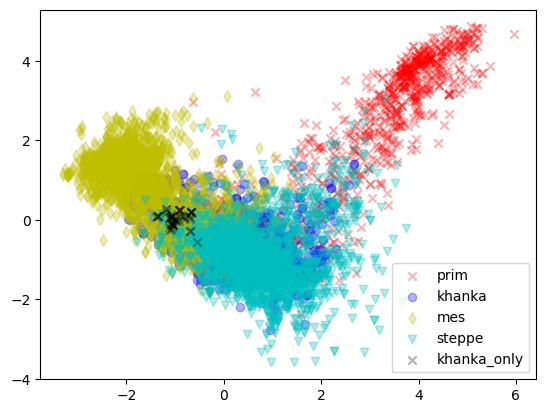

Explained coef ratio (LDA) for prim_khanka_mes_steppe_khanka_only: [0.59425638 0.3084311 ]

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.056048489743225405
wc2.1_30s_bio_16 = 0.046497333980186045
ai_v3_yr = 0.03928626483168852
wc2.1_30s_bio_13 = 0.038292493530007146
wc2.1_30s_bio_12 = 0.03791663979415765
current_30arcsec_minTempWarmest = 0.0350988079433833
current_30arcsec_continentality = 0.030996057127409986
current_30arcsec_climaticMoistureIndex = 0.02755411572345495
wc2.1_30s_bio_4 = 0.026616879978544825
wc2.1_30s_bio_8 = 0.026182397882077185
current_30arcsec_aridityIndexThornthwaite = 0.026138371224698323
current_30arcsec_embergerQ = 0.024899984950469377
wc2.1_30s_bio_3 = 0.02224623466016004
current_30arcsec_PETseasonality = 0.021959923397344854
wc2.1_30s_bio_19 = 0.021584828126624184
wc2.1_30s_bio_15 = 0.021196729163253457
wc2.1_30s_bio_10 = 0.020091416975808973
wc2.1_30s_elev = 0.018554164833033748
current_30arcsec_PETWettestQuarter = 0.018038743261938894
current_30arcsec_annualPET = 0.017894803075246022
current_30arcsec_tri = 0.017870907597683533
current_30arcsec_topoWet = 0.0175171140681690

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.58835605 0.54813265 0.51374895 0.64619198 0.64787013]


Balanced accuracy estimation for all features in the experiment:

[0.60731928 0.59418683 0.51895034 0.60001396 0.64353498]


Pair analysis. Feature set name: all_features

Datasets to compare: prim, khanka

Feature importances of all considered features:

wc2.1_30s_bio_19 = 0.07702274792468679
wc2.1_30s_bio_8 = 0.07245714307592103
current_30arcsec_embergerQ = 0.07190583805198132
wc2.1_30s_bio_17 = 0.05966082488713621
wc2.1_30s_bio_7 = 0.046162720486717906
current_30arcsec_continentality = 0.04513652373277258
wc2.1_30s_bio_14 = 0.04106693415116264
wc2.1_30s_bio_4 = 0.03865659816294552
wc2.1_30s_bio_12 = 0.03704252942027122
current_30arcsec_PETseasonality = 0.03004798044748118
wc2.1_30s_bio_15 = 0.021787108046770403
ai_v3_yr = 0.021342136750431305
current_30arcsec_minTempWarmest = 0.02098362507593607
current_30arcsec_growingDegDays5 = 0.02074357333456711
wc2.1_30s_bio_9 = 0.017749544922033116
current_30arcsec_growingDegDays0 = 0.01628006087338664
current_30arcsec_thermicityIndex = 0.01625507662703101
current_30arcsec_tri = 0.015814823116920857
wc2.1_30s_bio_10 = 0.015778009564071833
current_30arcsec_PETWarmestQuarter = 0.015041868719214393
current_30arcsec_topoWet = 0.014766537503357898
GRS_2000 = 0.014089954760104611
wc2.1_30s_bio_2 = 0.

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.82016793 0.84512563 0.81684198 0.81154657 0.81640329]


Balanced accuracy estimation for all features in the experiment:

[0.81905928 0.84179969 0.82062505 0.81962705 0.81674041]


Datasets to compare: prim, mes

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.15627744681978709
current_30arcsec_minTempWarmest = 0.10612036460425023
wc2.1_30s_bio_10 = 0.07196382052546901
wc2.1_30s_bio_5 = 0.051212340592272684
current_30arcsec_continentality = 0.0511601627037113
wc2.1_30s_bio_4 = 0.04375686123250087
current_30arcsec_PETWettestQuarter = 0.04192171716088098
wc2.1_30s_elev = 0.03426616568585562
current_30arcsec_growingDegDays5 = 0.02546995601415363
sq1 = 0.01956603036318282
wc2.1_30s_bio_18 = 0.017982607866007142
wc2.1_30s_bio_15 = 0.016495109783678064
sq7 = 0.015471919790455733
sq3 = 0.014068884252477798
current_30arcsec_tri = 0.013833958189659408
wc2.1_30s_bio_3 = 0.013600989712023708
current_30arcsec_thermicityIndex = 0.012941770026274321
wc2.1_30s_bio_7 = 0.012870888401993736
sq5 = 0.012475896041903222
current_30arcsec_PETDriestQuarter = 0.012344966916531386
wc2.1_30s_bio_13 = 0.012142052767814533
wc2.1_30s_bio_19 = 0.011243901775241108
wc2.1_30s_bio_16 = 0.010521022147519838
current_30arcsec_annualPET = 0.01039649087946170

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.91629131 0.90237685 0.90673103 0.87709111 0.87939787]


Balanced accuracy estimation for all features in the experiment:

[0.9149139  0.90000718 0.9019917  0.8804775  0.87601338]


Datasets to compare: prim, steppe

Feature importances of all considered features:

current_30arcsec_PETseasonality = 0.07496512880563426
current_30arcsec_climaticMoistureIndex = 0.07064561755596217
current_30arcsec_embergerQ = 0.0675570506978956
current_30arcsec_aridityIndexThornthwaite = 0.059651030436162995
ai_v3_yr = 0.0575168320867015
wc2.1_30s_bio_12 = 0.05443845547471458
current_30arcsec_PETWarmestQuarter = 0.038345302571800396
wc2.1_30s_bio_17 = 0.0332776621117605
wc2.1_30s_bio_4 = 0.02744462771023915
wc2.1_30s_bio_8 = 0.023260491328609186
current_30arcsec_PETWettestQuarter = 0.02157737968825217
wc2.1_30s_bio_19 = 0.02071601634156832
current_30arcsec_growingDegDays5 = 0.01863891487080953
current_30arcsec_annualPET = 0.01859343485297989
wc2.1_30s_bio_7 = 0.018337925998471845
wc2.1_30s_bio_5 = 0.017372978671462164
wc2.1_30s_bio_10 = 0.01717772415913094
wc2.1_30s_bio_14 = 0.016194857036559526
FOR_2000 = 0.015435140947961598
wc2.1_30s_elev = 0.015209049037806198
current_30arcsec_topoWet = 0.015163163501596097
et0_v3_yr = 0.015138951925416031
wc2.1_30s_bio_16 = 0.0

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.80824522 0.83511752 0.81009365 0.8189684  0.83165654]


Balanced accuracy estimation for all features in the experiment:

[0.79888481 0.84696586 0.80720274 0.82266526 0.82582959]


Datasets to compare: prim, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_10 = 0.1924602618344893
current_30arcsec_minTempWarmest = 0.1471004761296394
wc2.1_30s_bio_8 = 0.11814686212250716
wc2.1_30s_bio_5 = 0.049227657360986866
wc2.1_30s_bio_6 = 0.046016098964615955
wc2.1_30s_elev = 0.04395725940122937
current_30arcsec_growingDegDays0 = 0.04183928856773909
current_30arcsec_growingDegDays5 = 0.04065717067177579
wc2.1_30s_bio_1 = 0.029995586913392346
current_30arcsec_thermicityIndex = 0.029560270397115295
wc2.1_30s_bio_11 = 0.027160804860557667
wc2.1_30s_bio_18 = 0.02395007164121494
current_30arcsec_annualPET = 0.023560738424189397
wc2.1_30s_bio_9 = 0.02003596427211758
wc2.1_30s_bio_4 = 0.017977248554703167
current_30arcsec_continentality = 0.015787158672963975
wc2.1_30s_bio_19 = 0.01520902576789687
current_30arcsec_aridityIndexThornthwaite = 0.009694794450001496
current_30arcsec_PETDriestQuarter = 0.009236995058042118
current_30arcsec_maxTempColdest = 0.009122295377336841
current_30arcsec_topoWet = 0.009094089371091076
wc2.1_30s_bio_15 = 0.00806

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[1.   1.   0.95 1.   1.  ]


Balanced accuracy estimation for all features in the experiment:

[1.   1.   0.95 1.   1.  ]


Datasets to compare: khanka, mes

Feature importances of all considered features:

wc2.1_30s_bio_12 = 0.0672080308460153
current_30arcsec_embergerQ = 0.048212271805550794
ai_v3_yr = 0.04570268646821584
wc2.1_30s_bio_16 = 0.042392060466114115
wc2.1_30s_bio_18 = 0.040269174551981216
wc2.1_30s_bio_13 = 0.036886023947092325
current_30arcsec_aridityIndexThornthwaite = 0.03398657735953102
wc2.1_30s_bio_7 = 0.03218970011473277
wc2.1_30s_bio_11 = 0.03140672318219127
current_30arcsec_climaticMoistureIndex = 0.030154120534912735
wc2.1_30s_bio_6 = 0.021233684487721283
current_30arcsec_growingDegDays0 = 0.019985809484839443
current_30arcsec_tri = 0.01932740560185126
wc2.1_30s_bio_1 = 0.018850000743567838
wc2.1_30s_elev = 0.018302409413296934
current_30arcsec_topoWet = 0.017788143376089072
CULTRF_2000 = 0.017743046881648985
current_30arcsec_annualPET = 0.01767539072998687
current_30arcsec_growingDegDays5 = 0.01757726301892343
wc2.1_30s_bio_3 = 0.016468875800471017
wc2.1_30s_bio_2 = 0.016037823569723015
wc2.1_30s_bio_4 = 0.01588978840382865
URB_2000 = 0.015875846402815332
current_

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.76587069 0.73850837 0.77495677 0.7645132  0.74798428]


Balanced accuracy estimation for all features in the experiment:

[0.76280199 0.73863332 0.7676888  0.75010079 0.74588457]


Datasets to compare: khanka, steppe

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.04005144297014551
current_30arcsec_continentality = 0.03835509609286448
wc2.1_30s_bio_4 = 0.03517863654076669
current_30arcsec_aridityIndexThornthwaite = 0.031036250269665187
wc2.1_30s_bio_16 = 0.030945101508208357
ai_v3_yr = 0.02922012274249437
wc2.1_30s_bio_3 = 0.028436853719274246
wc2.1_30s_bio_15 = 0.028346678421190177
current_30arcsec_PETDriestQuarter = 0.02799022698479569
et0_v3_yr = 0.027663463299775242
wc2.1_30s_bio_9 = 0.027475331912859214
wc2.1_30s_bio_13 = 0.024295034364967875
current_30arcsec_maxTempColdest = 0.024146149301974024
wc2.1_30s_bio_11 = 0.02407276278837496
wc2.1_30s_elev = 0.023236699945847605
current_30arcsec_annualPET = 0.02318471521599787
wc2.1_30s_bio_12 = 0.021593535367988897
current_30arcsec_tri = 0.021087595560271687
FOR_2000 = 0.02013128382213208
wc2.1_30s_bio_6 = 0.02004009307798016
wc2.1_30s_bio_2 = 0.019964384439591535
current_30arcsec_topoWet = 0.01995023846530244
current_30arcsec_PETWarmestQuarter = 0.01951887655161451
GRS_2000 

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.66090737 0.66996753 0.68361128 0.65072277 0.66402449]


Balanced accuracy estimation for all features in the experiment:

[0.65187583 0.66848306 0.68471993 0.65552828 0.67363345]


Datasets to compare: khanka, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_4 = 0.04144331555753426
current_30arcsec_growingDegDays5 = 0.03944030409634668
wc2.1_30s_bio_17 = 0.03847443662787741
current_30arcsec_growingDegDays0 = 0.03715634362129164
wc2.1_30s_bio_1 = 0.035191925286948436
wc2.1_30s_bio_10 = 0.031843314307219386
wc2.1_30s_bio_15 = 0.03134971688046399
wc2.1_30s_bio_7 = 0.03018153216985496
current_30arcsec_annualPET = 0.029612666268398112
ai_v3_yr = 0.02941974718480445
current_30arcsec_PETDriestQuarter = 0.02927614610700334
current_30arcsec_embergerQ = 0.027916167875932665
current_30arcsec_PETColdestQuarter = 0.026877986794003137
et0_v3_yr = 0.026743608312749054
wc2.1_30s_bio_19 = 0.02621324868455412
current_30arcsec_thermicityIndex = 0.02595492738774433
wc2.1_30s_bio_6 = 0.025839016639658024
wc2.1_30s_bio_12 = 0.02579295414103522
wc2.1_30s_bio_9 = 0.02481944327876051
current_30arcsec_aridityIndexThornthwaite = 0.024021684886189613
wc2.1_30s_bio_11 = 0.02347935964094981
current_30arcsec_continentality = 0.02335324961169767
current_30a

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.69668142 0.64336283 0.72394678 0.76385809 0.5421286 ]


Balanced accuracy estimation for all features in the experiment:

[0.74668142 0.64336283 0.72394678 0.7172949  0.5421286 ]


Datasets to compare: mes, steppe

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.1092466269493742
wc2.1_30s_bio_16 = 0.07522952151476178
ai_v3_yr = 0.061721054447808274
wc2.1_30s_bio_12 = 0.04815688120571207
wc2.1_30s_bio_13 = 0.047958476024149634
current_30arcsec_aridityIndexThornthwaite = 0.04660079607510947
current_30arcsec_minTempWarmest = 0.043437786961440364
NVG_2000 = 0.03188462606266379
current_30arcsec_climaticMoistureIndex = 0.029316858992582927
wc2.1_30s_bio_8 = 0.026590808329816796
wc2.1_30s_elev = 0.022354543670038734
current_30arcsec_embergerQ = 0.021292080366431407
wc2.1_30s_bio_3 = 0.020219643324539623
et0_v3_yr = 0.01607415051982296
current_30arcsec_growingDegDays5 = 0.015700423442518055
CULTRF_2000 = 0.015227696723043414
wc2.1_30s_bio_15 = 0.015206568663385031
CULT_2000 = 0.015053222926502652
wc2.1_30s_bio_1 = 0.014554732008660132
wc2.1_30s_bio_10 = 0.01448348752685181
FOR_2000 = 0.014353564423361491
current_30arcsec_PETseasonality = 0.014159625991674975
current_30arcsec_tri = 0.01403797554157939
current_30arcsec_annualPET = 0

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.8865174  0.86614549 0.86888249 0.88397672 0.86759419]


Balanced accuracy estimation for all features in the experiment:

[0.88881713 0.87281486 0.85594349 0.88417658 0.8717086 ]


Datasets to compare: mes, khanka_only

Feature importances of all considered features:

current_30arcsec_annualPET = 0.05123752009478047
et0_v3_yr = 0.05080045383559133
wc2.1_30s_bio_9 = 0.038294179353310843
wc2.1_30s_bio_16 = 0.03688713031262235
wc2.1_30s_bio_18 = 0.03332199241279548
current_30arcsec_PETColdestQuarter = 0.033149134364446234
current_30arcsec_maxTempColdest = 0.0315843051669493
current_30arcsec_growingDegDays0 = 0.03147347888030016
wc2.1_30s_elev = 0.03103446230872054
wc2.1_30s_bio_11 = 0.030880513712514678
current_30arcsec_growingDegDays5 = 0.030523255548520745
wc2.1_30s_bio_13 = 0.029854807034363454
wc2.1_30s_bio_17 = 0.028098861340963763
wc2.1_30s_bio_15 = 0.027831014460094672
ai_v3_yr = 0.025876318390851527
wc2.1_30s_bio_1 = 0.025597365984501307
wc2.1_30s_bio_2 = 0.02440473867904728
wc2.1_30s_bio_12 = 0.022964261454147674
wc2.1_30s_bio_8 = 0.022924250173693633
current_30arcsec_PETWettestQuarter = 0.022468821208246833
wc2.1_30s_bio_19 = 0.02204677244699825
current_30arcsec_continentality = 0.021714963065248075
wc2.1_30s_bio_7 = 0.020728946711282583
curr

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[0.74862448 0.81473829 0.95179063 0.81749311 0.84793388]


Balanced accuracy estimation for all features in the experiment:

[0.79862448 0.81336088 0.81473829 0.77272727 0.79862259]


Datasets to compare: steppe, khanka_only

Feature importances of all considered features:

et0_v3_yr = 0.05629858643970793
wc2.1_30s_bio_13 = 0.05396554028331965
current_30arcsec_aridityIndexThornthwaite = 0.05009542694752848
wc2.1_30s_bio_17 = 0.04557877878573043
ai_v3_yr = 0.042642398695417735
wc2.1_30s_bio_18 = 0.04253628776648892
wc2.1_30s_bio_16 = 0.040140380284421934
wc2.1_30s_elev = 0.04009368423027025
wc2.1_30s_bio_10 = 0.03778100532978727
wc2.1_30s_bio_11 = 0.036802744618695815
wc2.1_30s_bio_7 = 0.03573240957422615
current_30arcsec_growingDegDays5 = 0.03213314219178797
wc2.1_30s_bio_1 = 0.0311499832427817
wc2.1_30s_bio_4 = 0.030326455214815945
current_30arcsec_growingDegDays0 = 0.029782385328459025
wc2.1_30s_bio_15 = 0.029771389236081053
wc2.1_30s_bio_3 = 0.02964509329148486
wc2.1_30s_bio_19 = 0.02835600110986555
wc2.1_30s_bio_6 = 0.024798140862508835
current_30arcsec_minTempWarmest = 0.024551015869109613
current_30arcsec_thermicityIndex = 0.0208321527385294
current_30arcsec_continentality = 0.018729597501043704
current_30arcsec_annualPET = 0.018379493545208875
wc2.

Recursive feature elimination procedure, selection the most informative features from

['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingD

Balanced accuracy estimation for the best feature subset:

[1.         0.95454545 1.         1.         1.        ]


Balanced accuracy estimation for all features in the experiment:

[0.95454545 0.95454545 1.         1.         1.        ]


END OF COMPUTATIONS

In [271]:
analyze_all()

In [272]:
datasets = {
    'prim': data_prim,
    'khanka':data_khanka,
    'mes': data_mes,
    'steppe': data_steppe,
    'khanka_only': hanka_only,
    'checks': data_steppe_checks
}

for key, df in datasets.items():
    df.describe().to_csv(f'.\\stat\\{key}_stat.csv')

In [273]:
clf = RandomForestClassifier()
clf.fit(X, y)


RandomForestClassifier()

In [274]:
r = permutation_importance(clf, X, y, n_repeats=3, random_state=0, n_jobs=5)

In [275]:
r

{'importances_mean': array([ 7.90459498e-04,  4.12413651e-04,  4.81149259e-04,  5.49884868e-04,
         3.09310238e-04, -1.03103413e-04,  1.03103413e-04,  6.87356085e-05,
         1.71839021e-04, -6.87356085e-05,  3.43678042e-04,  1.03103413e-04,
         1.37471217e-04,  1.37471217e-04,  4.46781455e-04,  1.64965460e-03,
        -2.74942434e-04, -1.37471217e-04, -4.12413651e-04,  1.85586143e-03,
         3.09310238e-04,  3.43678042e-04, -1.03103413e-04,  1.03103413e-03,
         8.59195106e-04,  5.84252672e-04, -6.87356085e-05, -5.84252672e-04,
         1.37471217e-04, -3.43678042e-05,  8.93562910e-04,  4.46781455e-04,
        -2.74942434e-04,  1.03103413e-04,  4.46781455e-04, -3.78045847e-04,
        -2.74942434e-04, -2.74942434e-04, -3.43678042e-04, -4.81149259e-04,
         1.03103413e-04,  6.87356085e-05, -3.78045847e-04,  3.78045847e-04,
         1.71839021e-04, -7.21723889e-04, -1.71839021e-04, -2.06206825e-04,
         5.84252672e-04, -3.43678042e-05,  6.87356085e-05,  8.591951